

# **Data Science Foundations**

**Author** : **Muhammad Adil Naeem**

**Date** : **21/08/2024**

----

### **Exploratory Data Analysis Case Study using `Student Performance Prediction`**

In this Notebook we wil do a case study using `Student Performance Prediction` Dataset.


----

### **Life cycle of Machine learning Project**

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### **1) Problem statement**
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### **2) Data Collection**

- The data consists of 8 column and 1000 rows.

#### **Import Libraries**

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

#### **Load the data**

In [120]:
data = pd.read_csv(r"C:\Users\user\Desktop\Python With Krish Naik\New\Data Science Foundations\student_performance.csv")

#### **Take a Look at First 5 rows of dataset**

In [121]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### **Shape of the Dataset**

In [122]:
print(f"This dataset consist of {data.shape[0]} rows and {data.shape[1]} columns.")

This dataset consist of 1000 rows and 8 columns.


### **2.2 Dataset information**

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### **3. Data Checks to perform**

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### **To Check  Detailed Information about Dataset**

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### **Check Missing Values**

In [124]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### **Check Duplicate Values**

In [125]:
data.duplicated().sum()

0

#### **Check Unique Values in Each Column**

In [126]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### **Check Statistics of Numerical Columns**

In [127]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### **Insight**

- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading higher = 17

### **Exploring Data Features Catagories**

#### **`gender`**

In [128]:
print("Categories in 'gender' variable:",end=" " )
print(data['gender'].unique())

Categories in 'gender' variable: ['female' 'male']


#### **`race/ethnicity`**

In [129]:
print("Categories in 'race/ethnicity' variable:",end=" ")
print(data['race/ethnicity'].unique())

Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']


#### **`parental level of education`**

In [130]:
print("Categories in'parental level of education' variable:",end=" " )
print(data['parental level of education'].unique())

Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


#### **`lunch`**

In [131]:
print("Categories in 'lunch' variable:",end=" " )
print(data['lunch'].unique())

Categories in 'lunch' variable: ['standard' 'free/reduced']


#### **`parental level of education`**

In [132]:
print("Categories in 'test preparation course' variable:",end=" " )
print(data['test preparation course'].unique())

Categories in 'test preparation course' variable: ['none' 'completed']


### **Define numerical & categorical columns**

In [133]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

### **Print numerical & categorical columns**

In [134]:
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### **Adding columns for "Total Score" and "Average"**

In [135]:
data['total score'] = data['math score'] + data['reading score'] + data['writing score']
data['average'] = data['total score']/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### **Checking Number of Students with Full Marks**

In [136]:
reading_full = data[data['reading score'] == 100]['average'].count()
writing_full = data[data['writing score'] == 100]['average'].count()
math_full = data[data['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


### **Checking Number of Students with Less than 20 Marks**

In [137]:
reading_less_20 = data[data['reading score'] <= 20]['average'].count()
writing_less_20 = data[data['writing score'] <= 20]['average'].count()
math_less_20 = data[data['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### **Insights**

 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### **4. Exploring Data ( Visualization )**

#### **Visualize average score distribution to make some conclusion using Bi-Variate Analysis.**
- Histogram
- Kernel Distribution Function (KDE)

#### **Histogram & KDE**

##### **average**

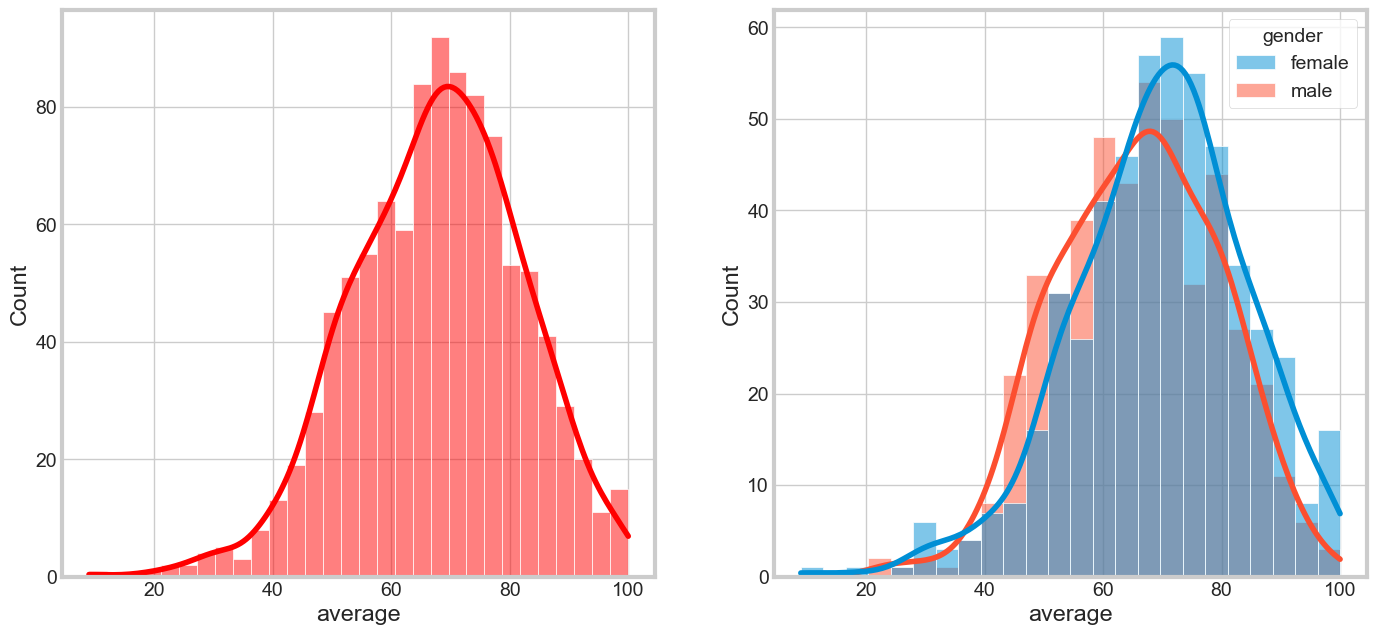

In [138]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='average',bins=30,kde=True,color='red')
plt.subplot(122)
sns.histplot(data=data,x='average',kde=True,hue='gender')
plt.show()

####  **Insights**
- Female students tend to perform well then male students.

##### **Check average score on base of Lunch**

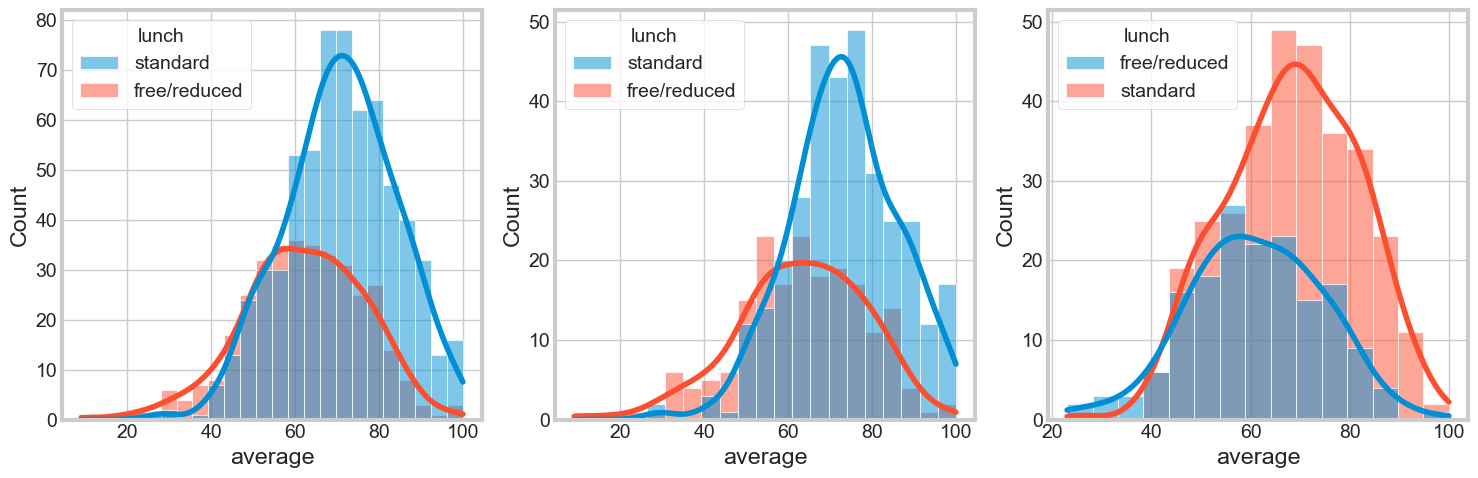

In [139]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.histplot(data=data, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=data[data.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=data[data.gender=='male'], x='average', kde=True, hue='lunch')
plt.tight_layout()
plt.show()

In [140]:
data[data.lunch=='standard'].describe()

,math score,reading score,writing score,total score,average
count,645.000000,645.000000,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256,212.511628,70.837209
std,13.653501,13.830602,14.339487,39.559515,13.186505
min,19.000000,26.000000,22.000000,78.000000,26.000000
25%,61.000000,63.000000,62.000000,187.000000,62.333333
50%,69.000000,72.000000,72.000000,214.000000,71.333333
75%,80.000000,82.000000,81.000000,239.000000,79.666667
max,100.000000,100.000000,100.000000,300.000000,100.000000


##### **Check average score on base of parental level of education**

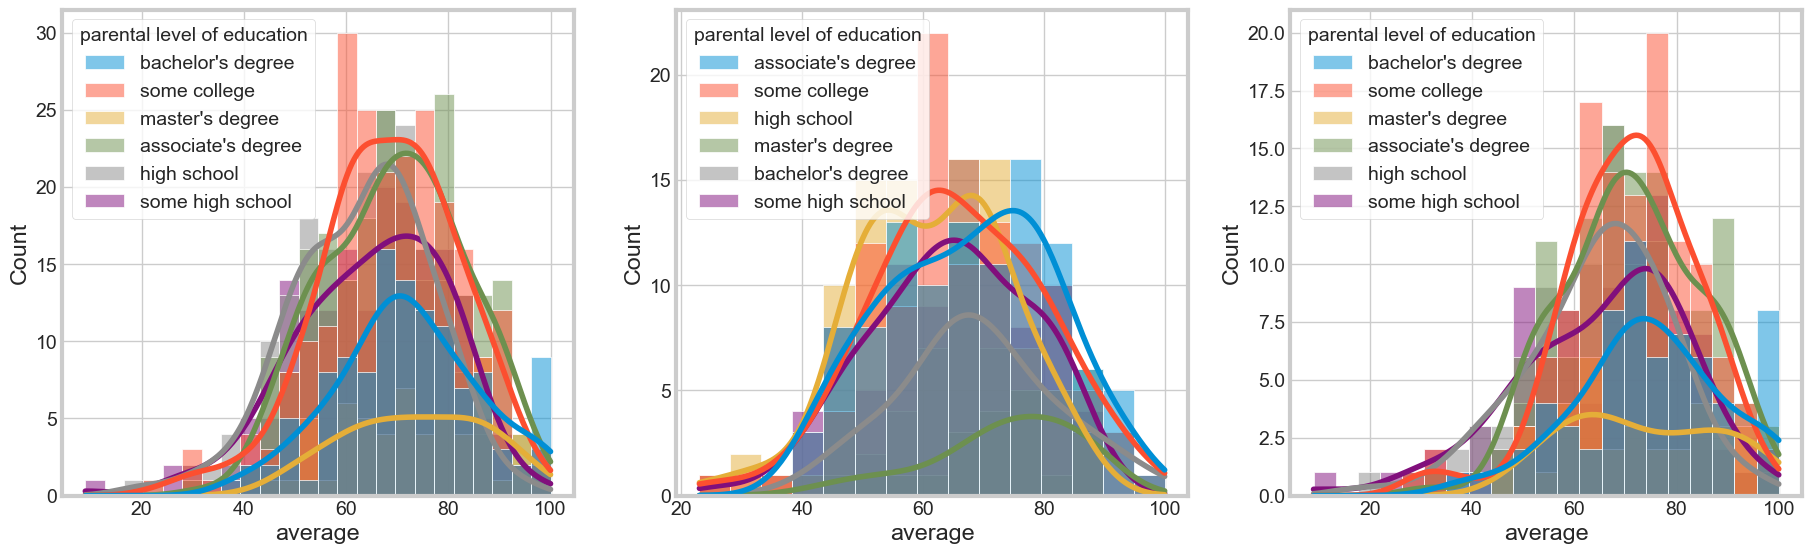

In [141]:
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed

# Plot the first histogram
plt.subplot(131)
ax = sns.histplot(data=data, x='average', kde=True, hue='parental level of education')

# Plot the second histogram for male data
plt.subplot(132)
ax = sns.histplot(data=data[data.gender=='male'], x='average', kde=True, hue='parental level of education')

# Plot the third histogram for female data
plt.subplot(133)
ax = sns.histplot(data=data[data.gender=='female'], x='average', kde=True, hue='parental level of education')

plt.show()

#### **Insights**

- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

##### **Check average score on base of race/ethnicity**

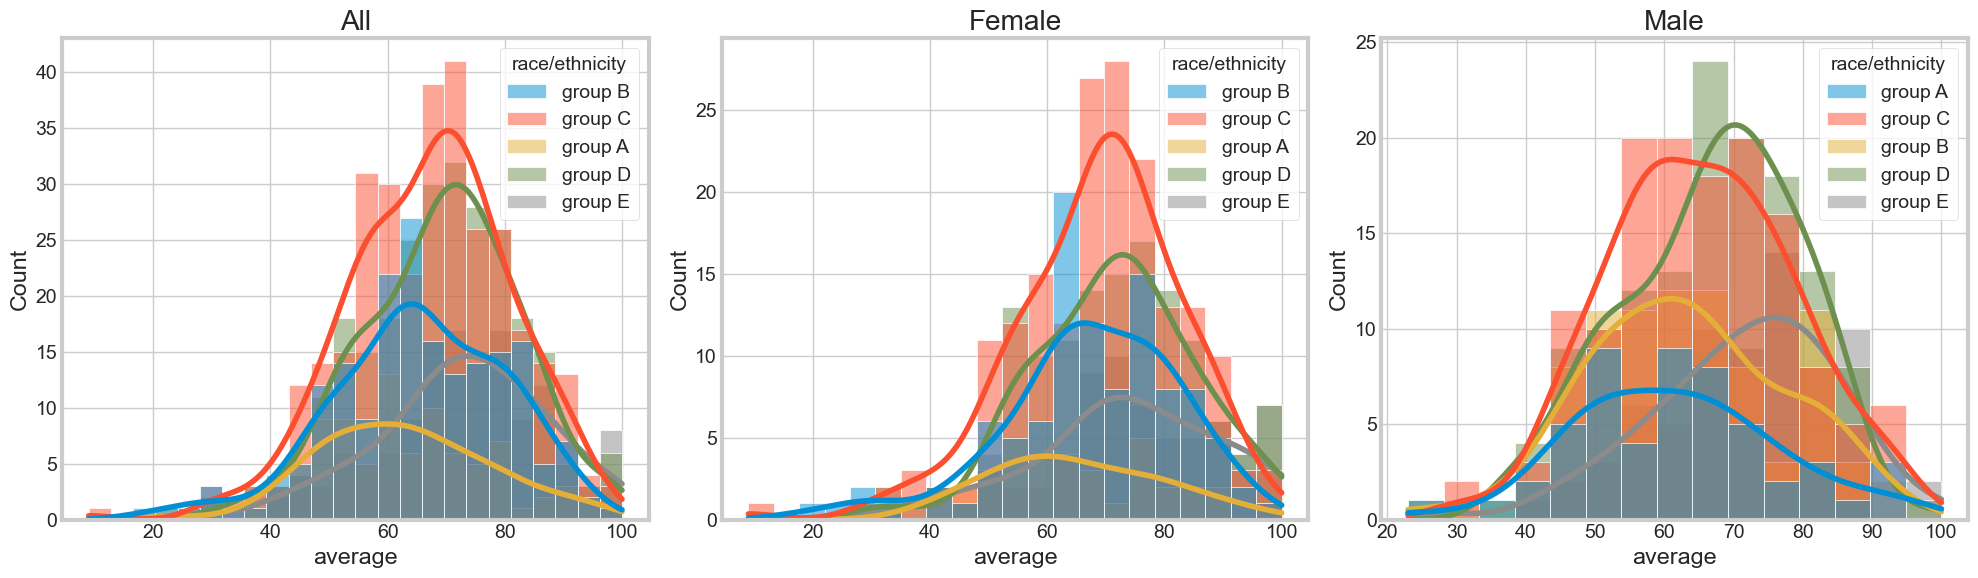

In [142]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
ax = sns.histplot(data=data, x='average', kde=True, hue='race/ethnicity')
plt.title('All')

plt.subplot(132)
ax = sns.histplot(data=data[data.gender=='female'], x='average', kde=True, hue='race/ethnicity')
plt.title('Female')

plt.subplot(133)
ax = sns.histplot(data=data[data.gender=='male'], x='average', kde=True, hue='race/ethnicity')
plt.title('Male')

plt.tight_layout()
plt.show()

#### **Insights**

- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### **Maximumum score of students in all three subjects**

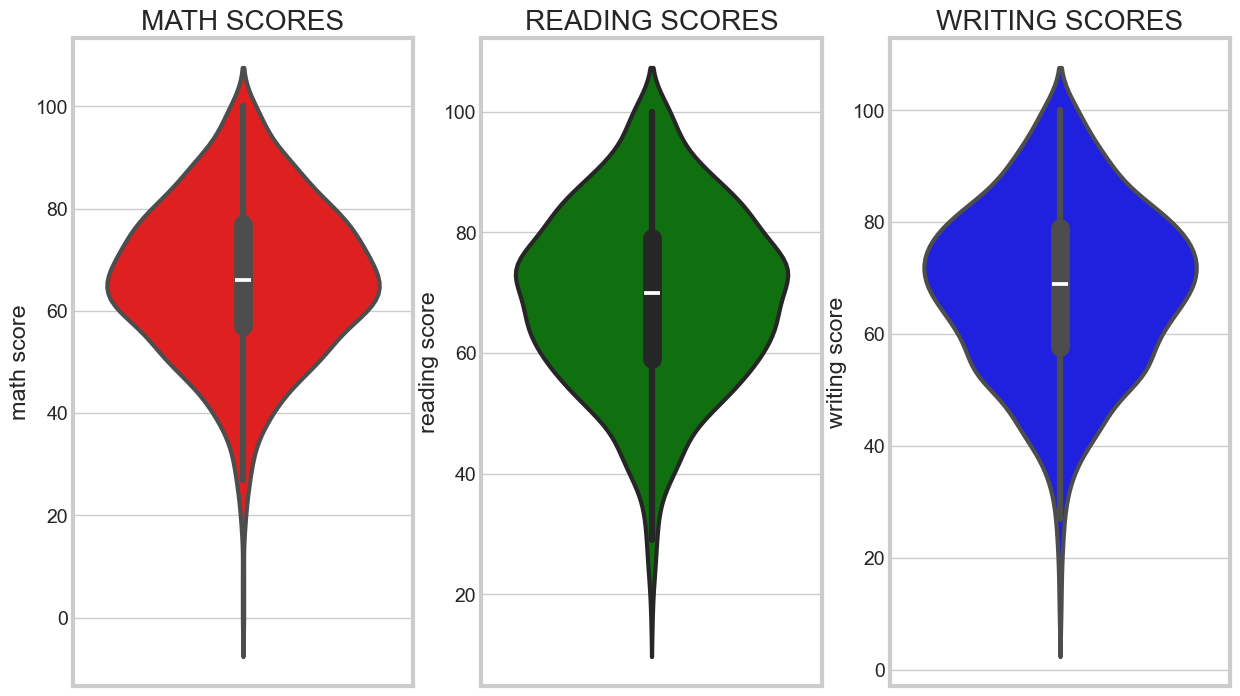

In [143]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=data,color='blue',linewidth=3)
plt.show()

#### **Insights**

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

### **`Multi-Variate Analysis`**

#### **gender**

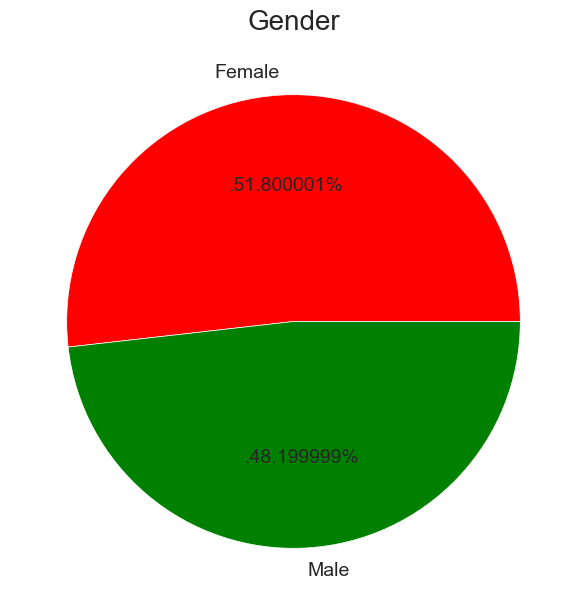

In [144]:
plt.rcParams['figure.figsize'] = (20, 7)

size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.show()

#### **race/ethnicity**

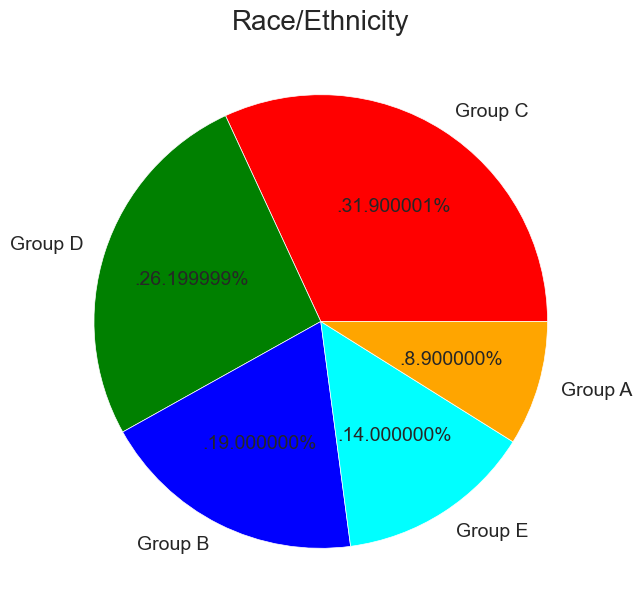

In [145]:
size = data['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')
plt.show()

#### **lunch**

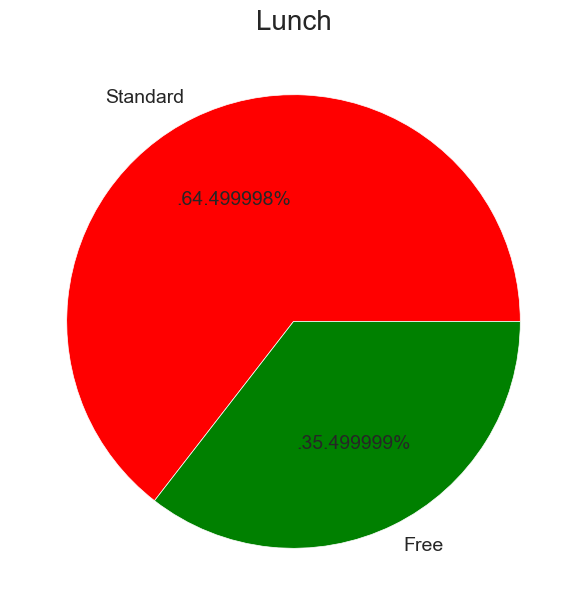

In [146]:
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')
plt.show()

#### **test preparation course**

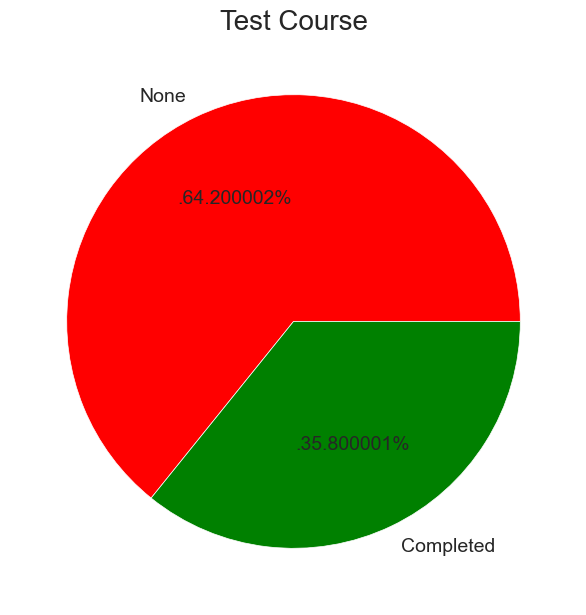

In [147]:
size = data['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')
plt.show()

#### **parental level of education**

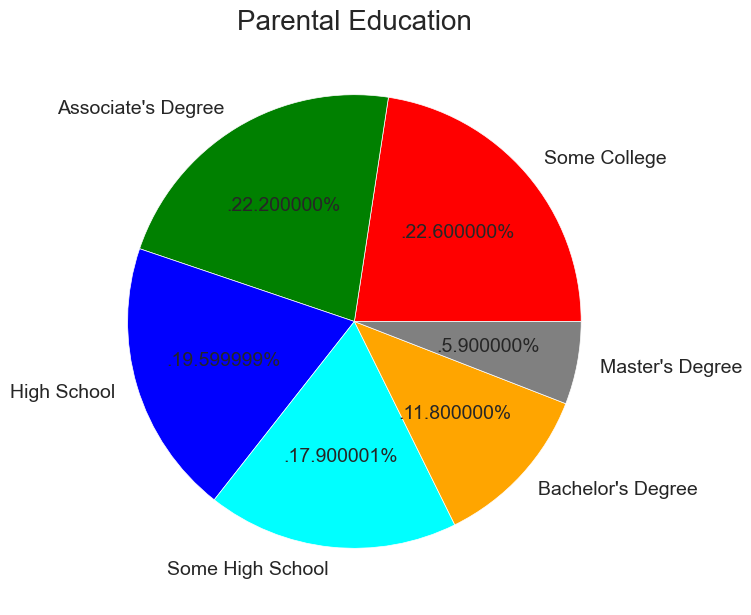

In [148]:
size = data['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')
plt.show()

####  **Insights**

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### **Feature Wise Visualization**

#### **GENDER COLUMN**
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### **UNIVARIATE ANALYSIS ( How is distribution of Gender ? )**

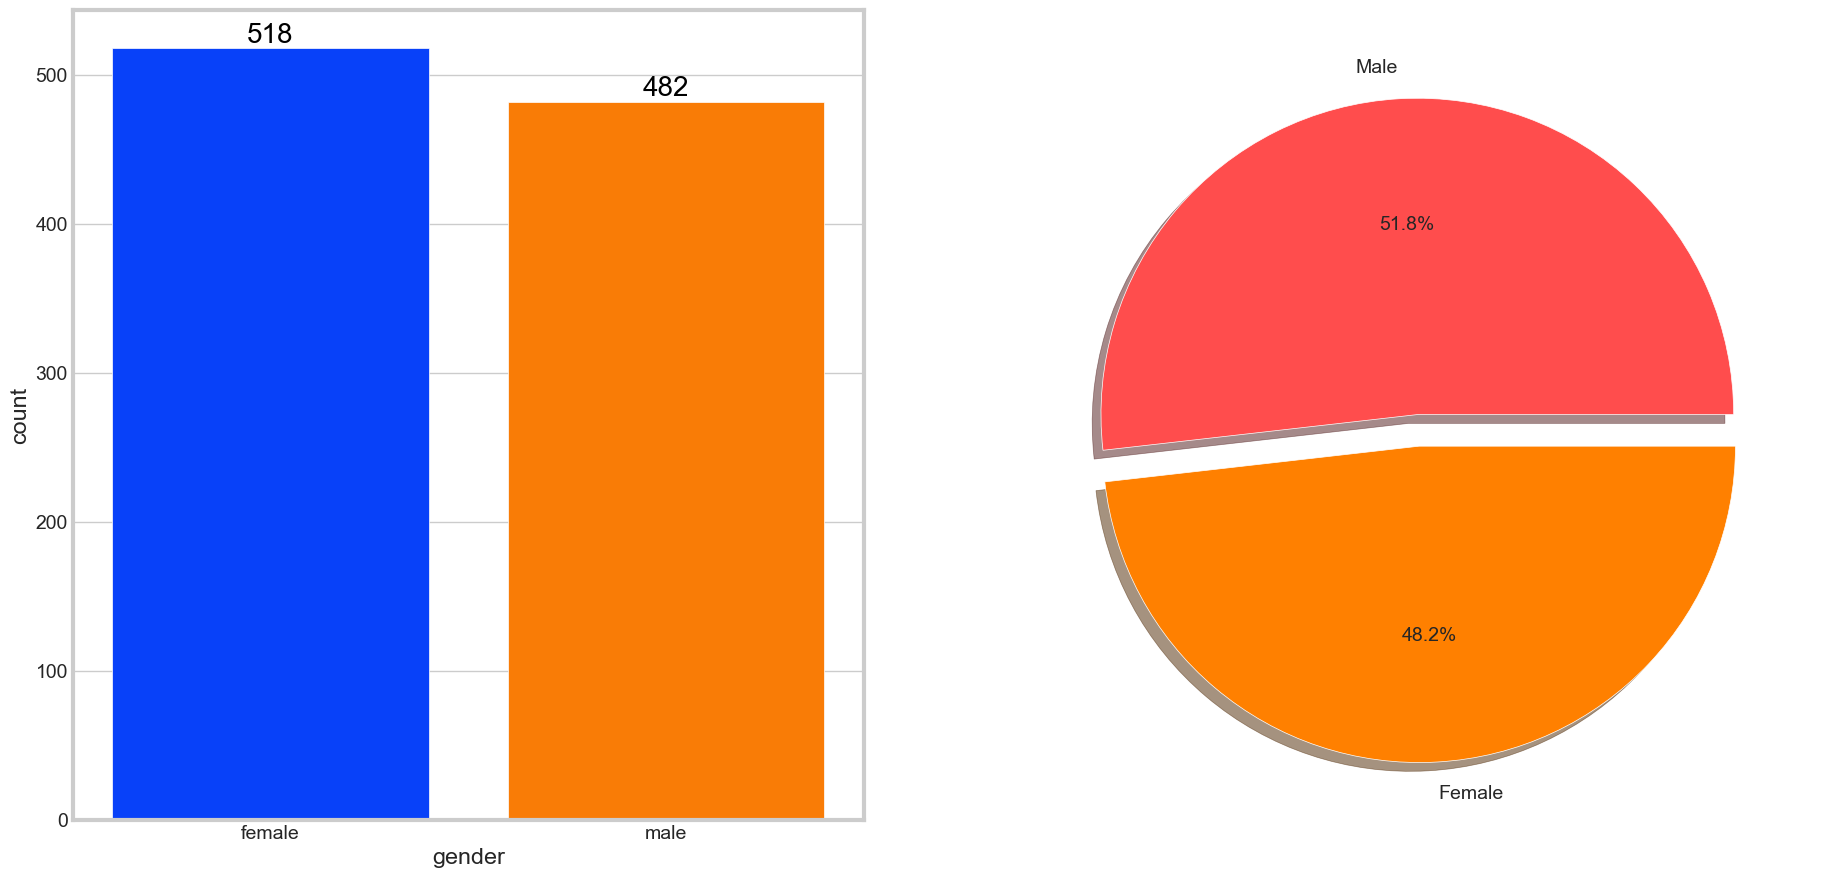

In [149]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### **Insights**
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%).

#### **BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )**

In [150]:
# Convert 'gender' column to categorical
data['gender'] = data['gender'].astype('category')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'gender' column
data['gender'] = label_encoder.fit_transform(data['gender'])

# Select only numeric columns for the groupby operation
numeric_df = data.select_dtypes(include=['number'])

# Group by 'gender' and calculate mean
gender_group = numeric_df.groupby('gender').mean()
print(gender_group)

        math score  reading score  writing score  total score    average
gender                                                                  
0        63.633205      72.608108      72.467181   208.708494  69.569498
1        68.728216      65.473029      63.311203   197.512448  65.837483


#### **Plotting Total average v/s Math average marks of both the genders**

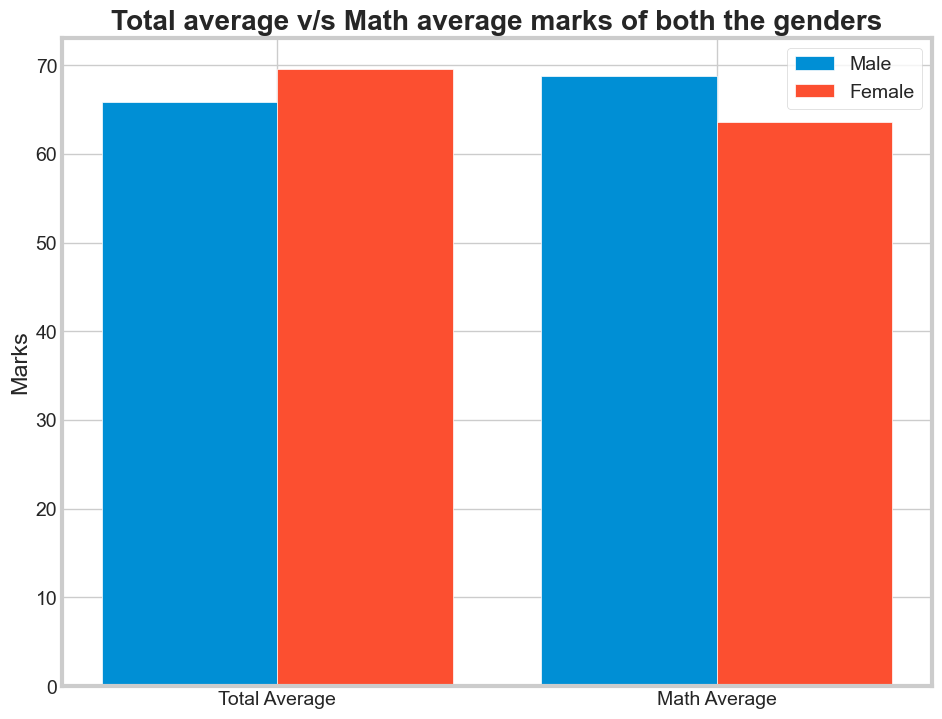

In [151]:

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### **Insights**

- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### **RACE / EHNICITY COLUMN**
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### **UNIVARIATE ANALYSIS ( How is Group wise distribution ?)**

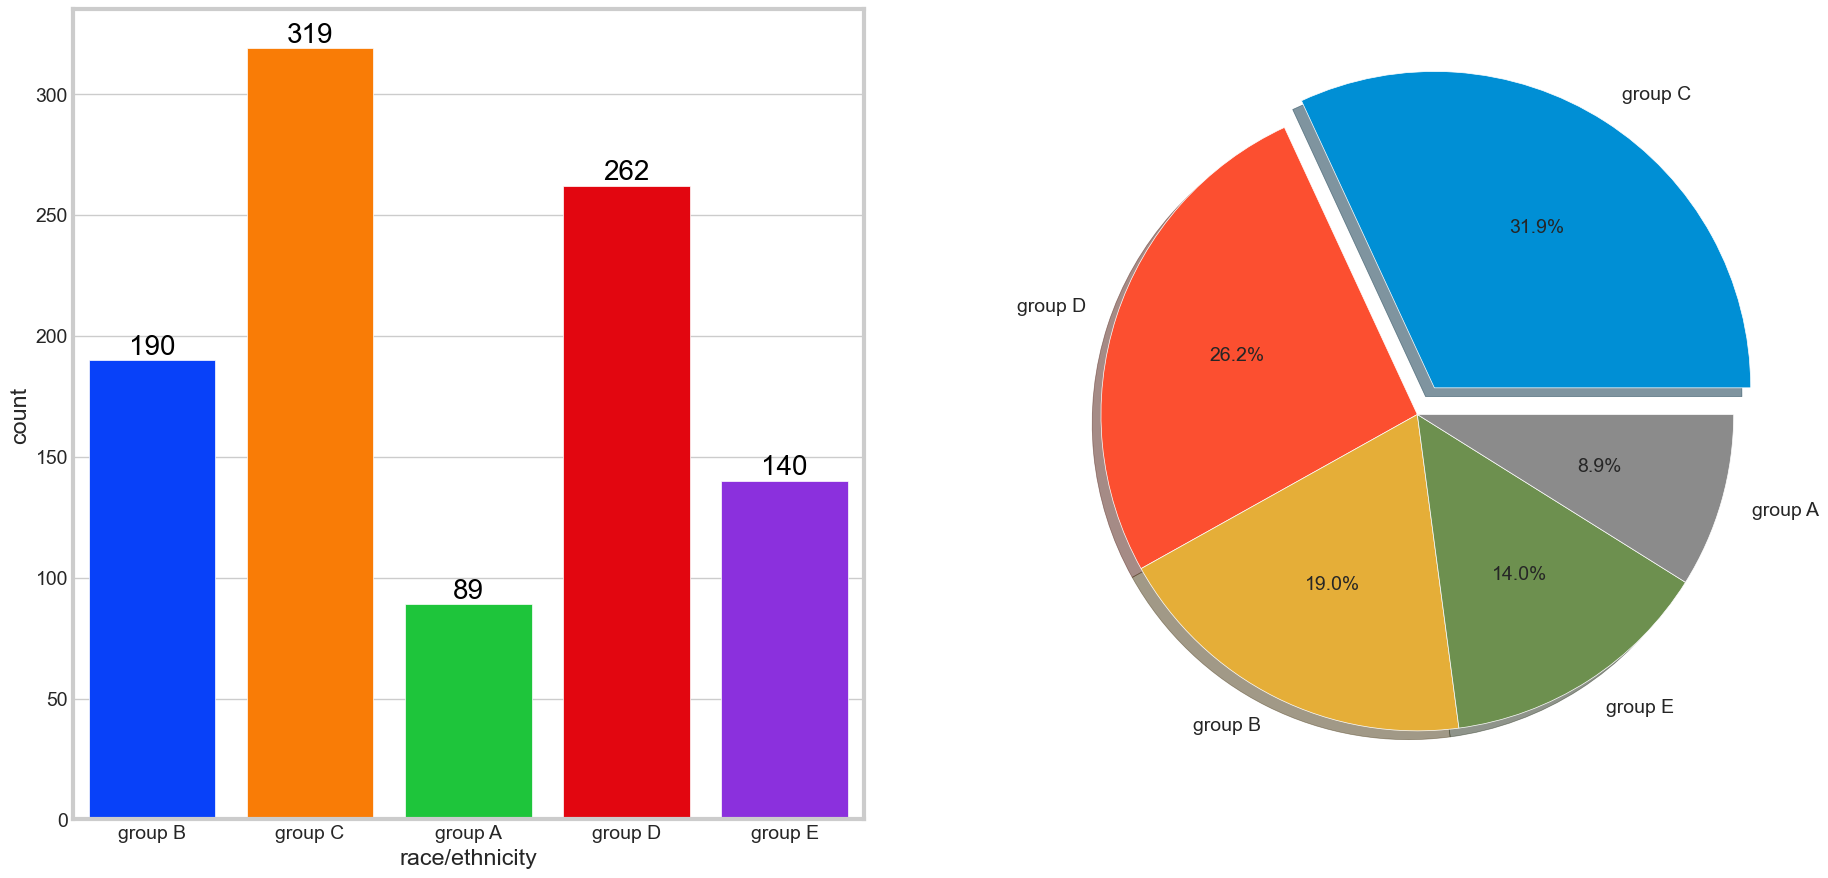

In [152]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['race/ethnicity'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = data['race/ethnicity'].value_counts(),labels=data['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### **Insights** 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### **BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )**

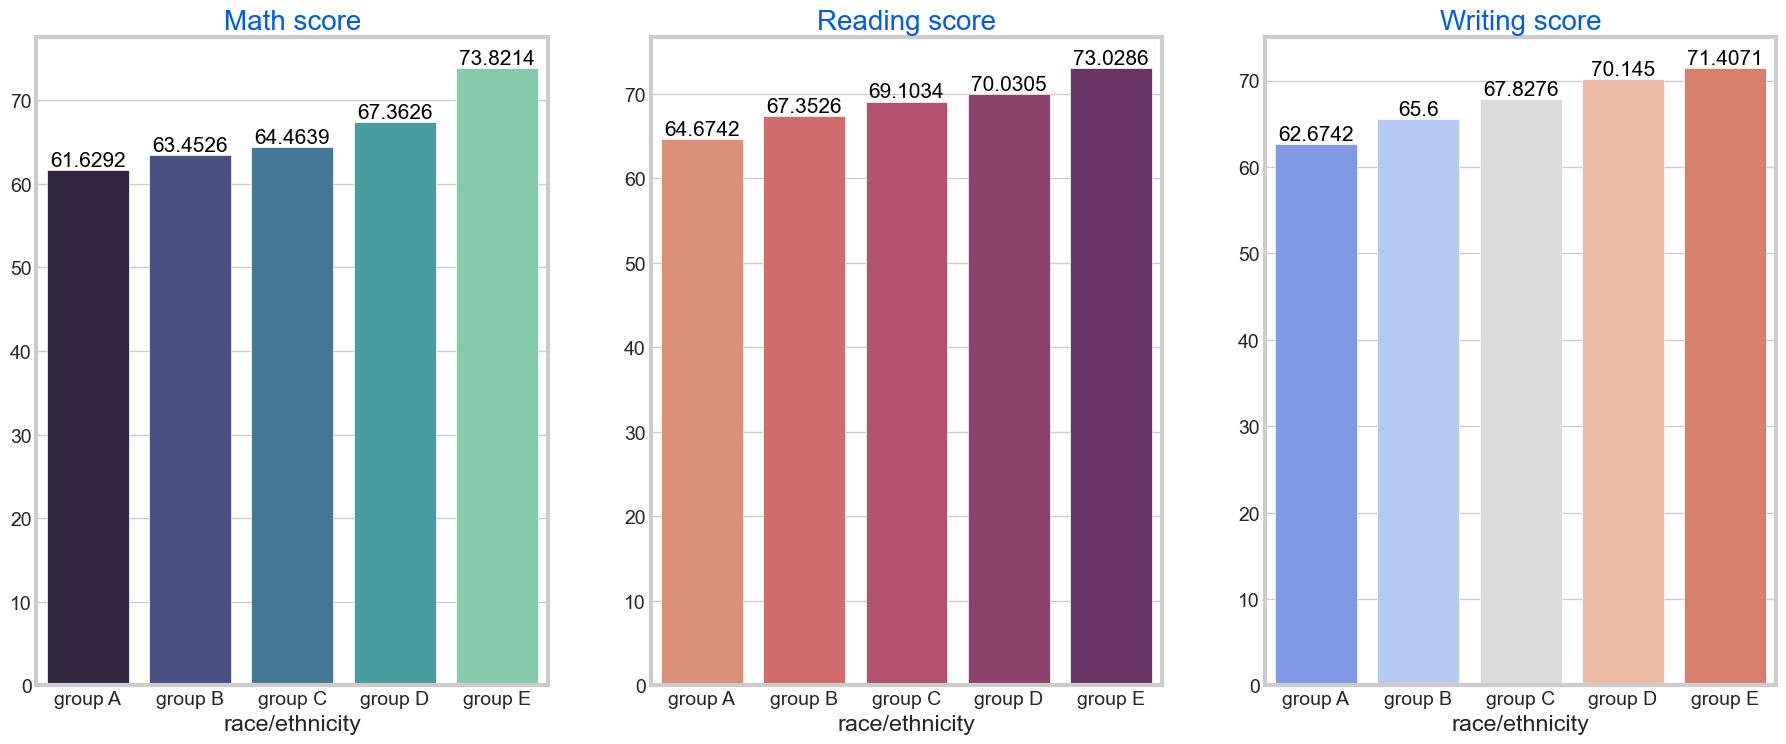

In [153]:
Group_data2 = data.groupby('race/ethnicity')
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

##### **Insights**
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### **PARENTAL LEVEL OF EDUCATION COLUMN**
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### **UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )**

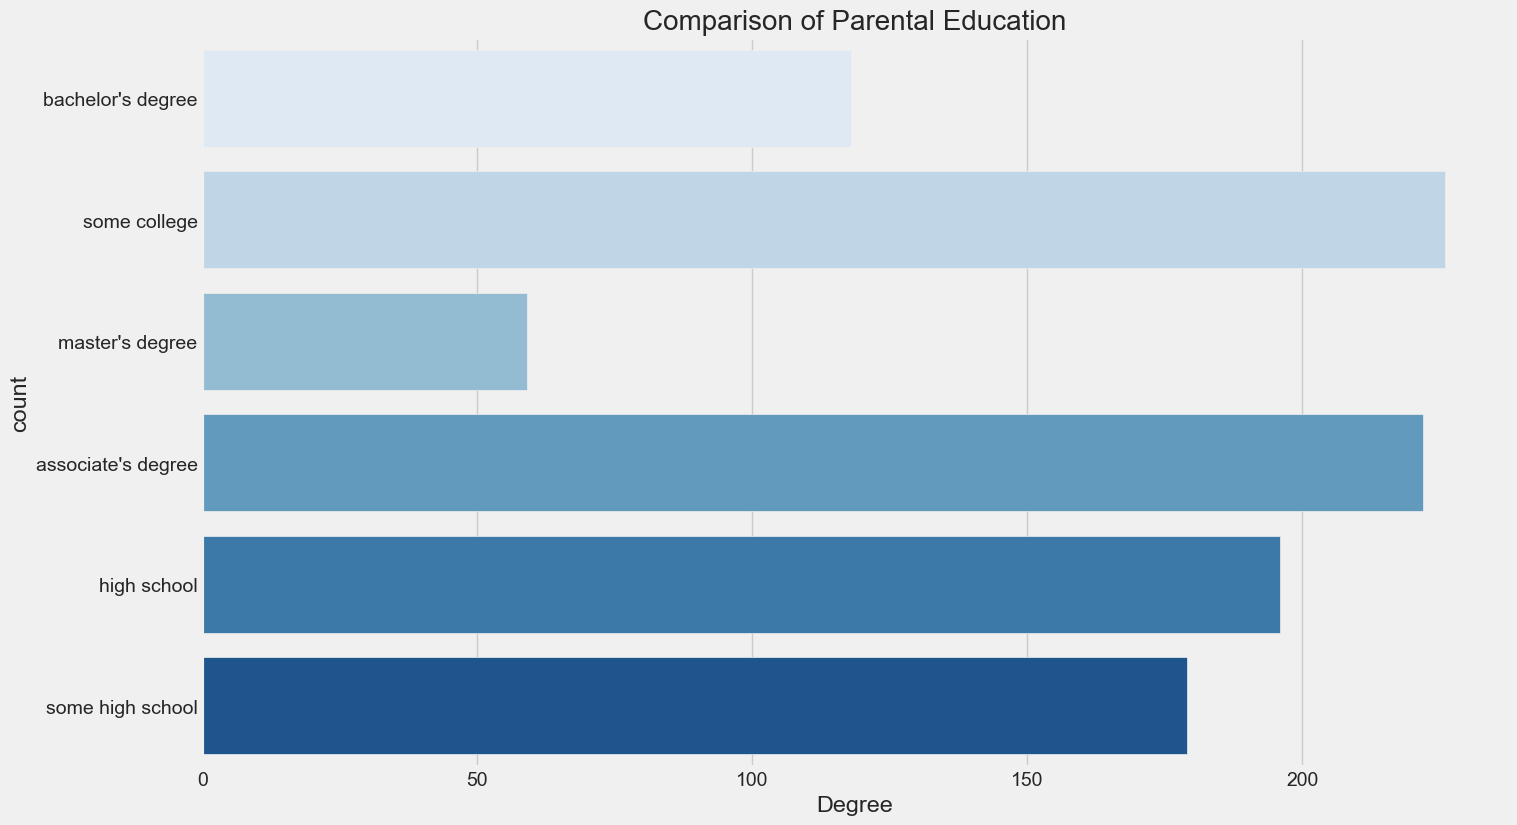

In [154]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### **Insights** 
- Largest number of parents are from some college.

### **LUNCH COLUMN** 

- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### **UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )**

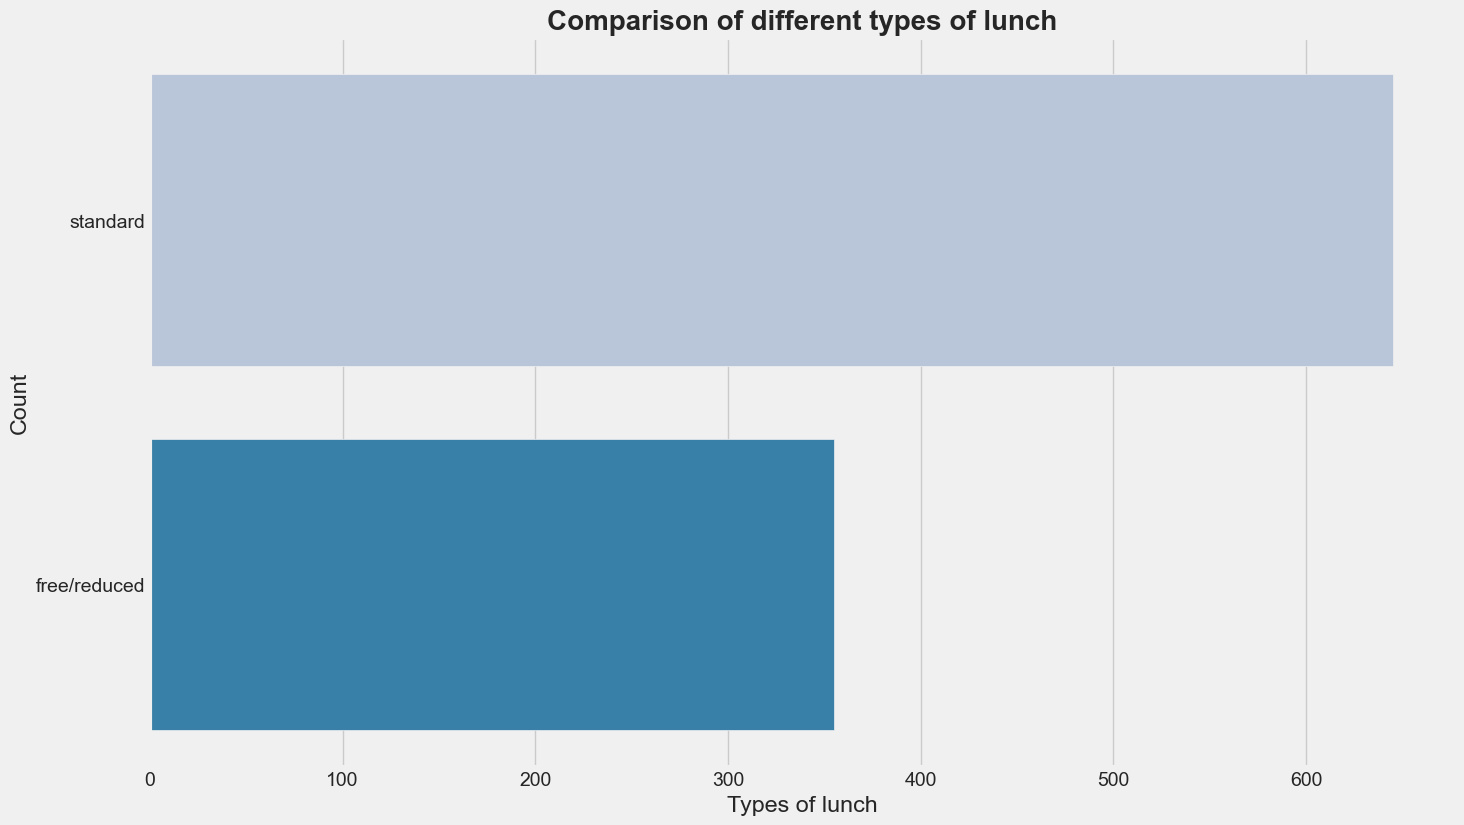

In [155]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')  # Using 'ggplot' as an alternative style
sns.countplot(data['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of lunch')
plt.ylabel('Count')
plt.show()

#### **Insights** 
- Students being served Standard lunch was more than free lunch

#### **BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )**

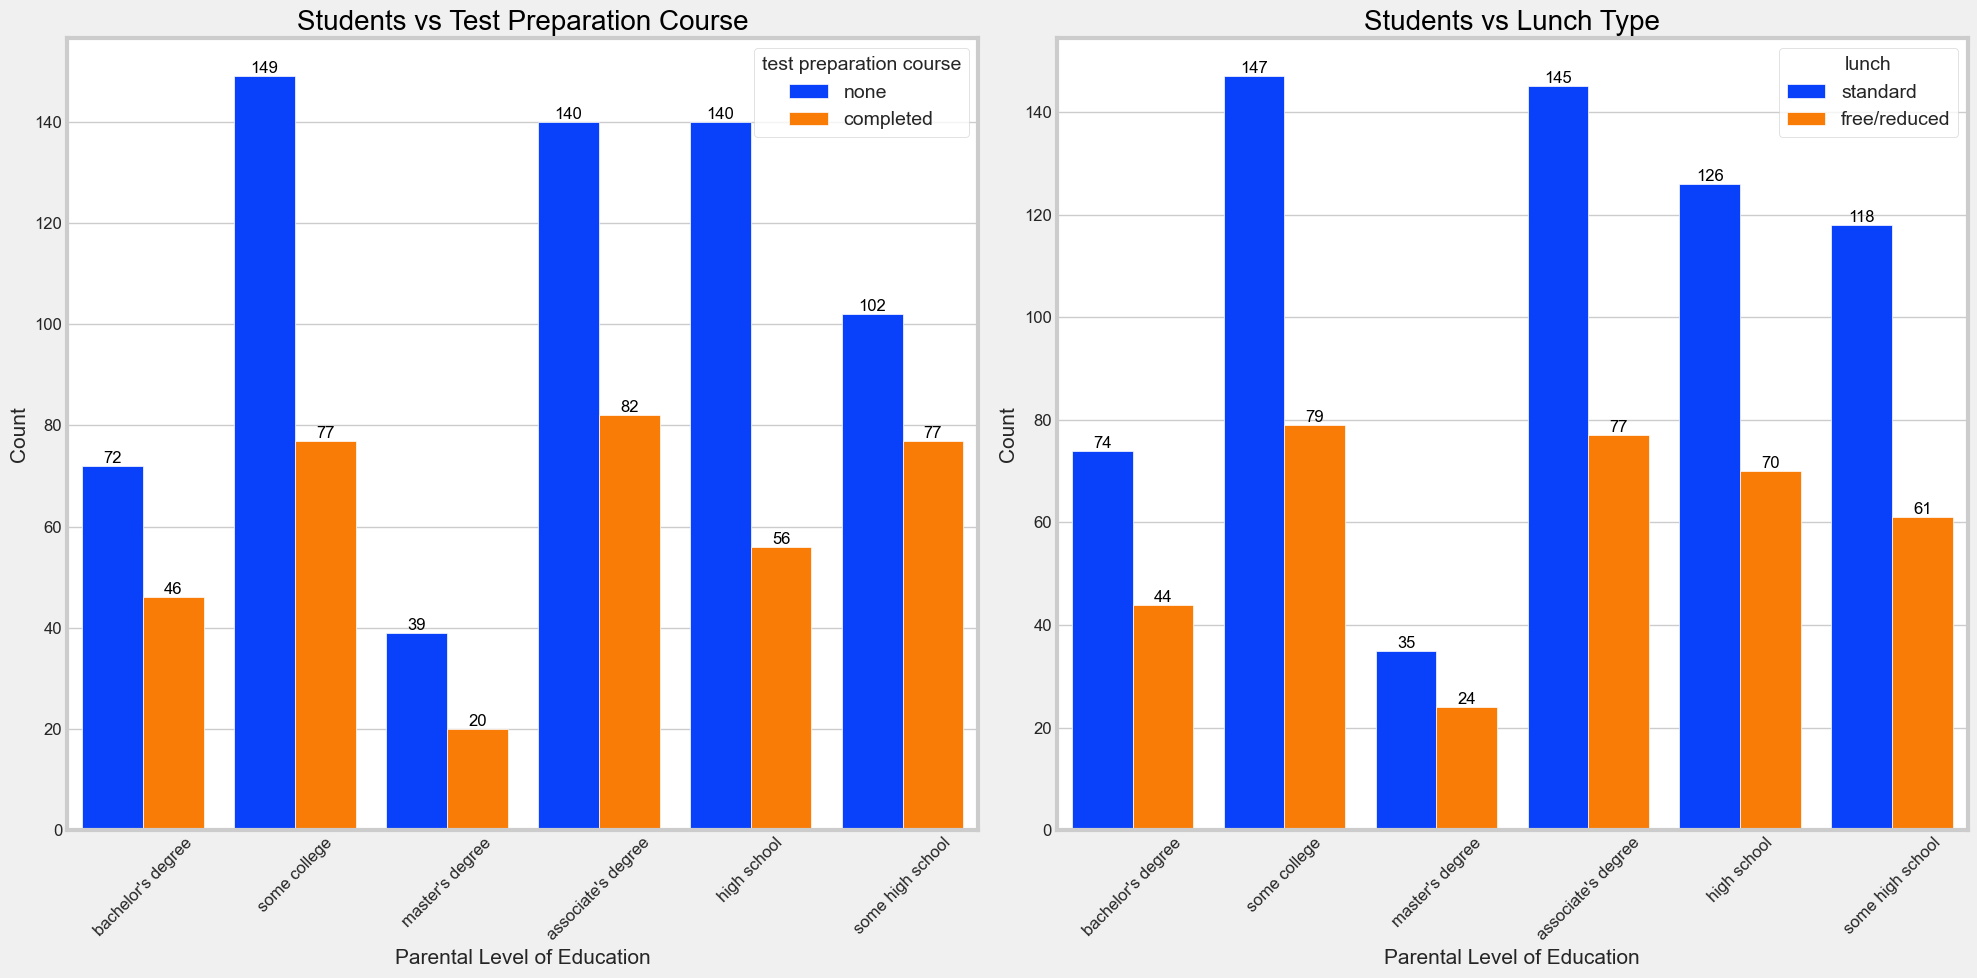

In [156]:
# Adjust layout and style
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")

# Plot for test preparation course
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='parental level of education', data=data, palette='bright', hue='test preparation course', saturation=0.95)
plt.title('Students vs Test Preparation Course', color='black', size=20)
plt.xlabel('Parental Level of Education', size=15)
plt.ylabel('Count', size=15)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', color='black', size=12)

# Plot for lunch
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='parental level of education', data=data, palette='bright', hue='lunch', saturation=0.95)
plt.title('Students vs Lunch Type', color='black', size=20)
plt.xlabel('Parental Level of Education', size=15)
plt.ylabel('Count', size=15)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', color='black', size=12)

# Adjust layout
plt.tight_layout()
plt.show()

##### **Insights** 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

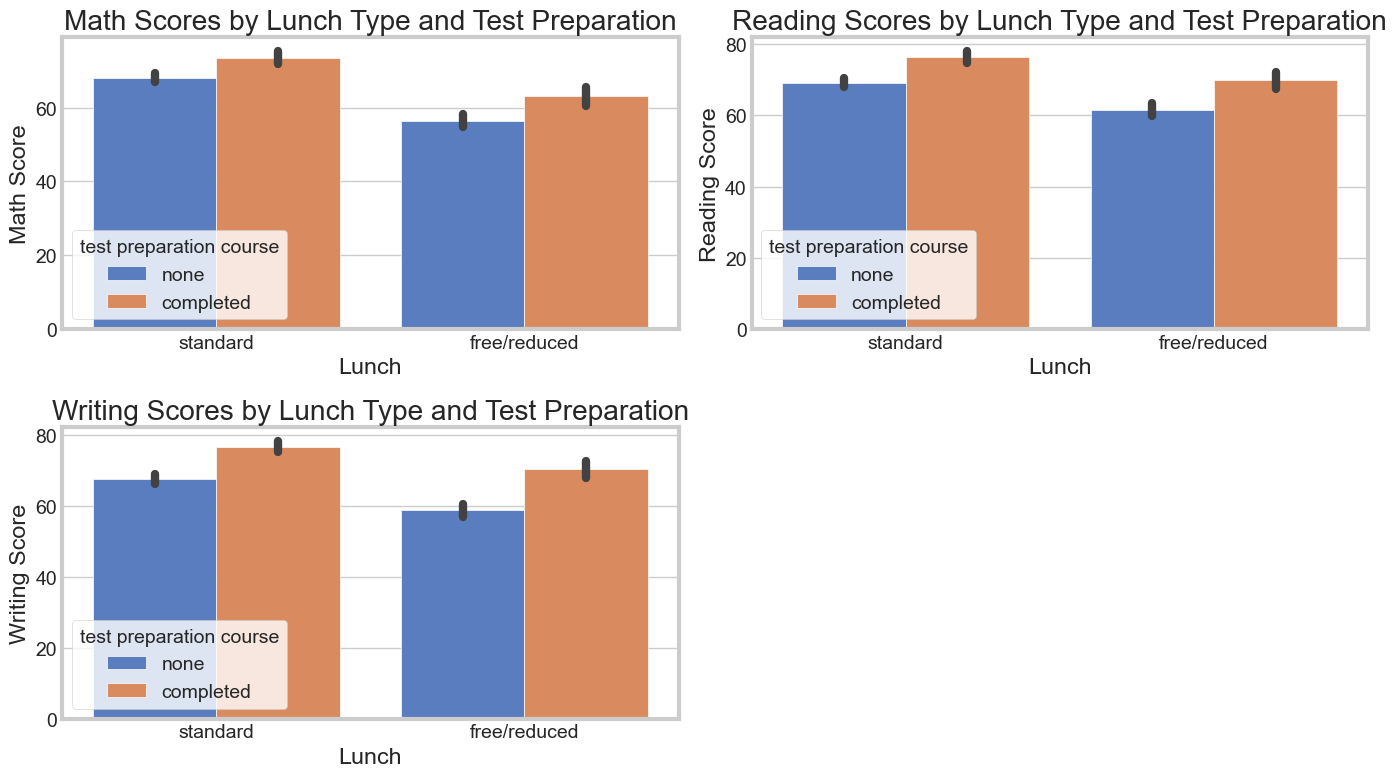

In [157]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with a specific size
plt.figure(figsize=(14,8))

# First subplot - Math Scores
plt.subplot(2, 2, 1)
sns.barplot(x='lunch', y='math score', hue='test preparation course', data=data, palette='muted')
plt.title('Math Scores by Lunch Type and Test Preparation')
plt.xlabel('Lunch')
plt.ylabel('Math Score')

# Second subplot - Reading Scores
plt.subplot(2, 2, 2)
sns.barplot(x='lunch', y='reading score', hue='test preparation course', data=data, palette='muted')
plt.title('Reading Scores by Lunch Type and Test Preparation')
plt.xlabel('Lunch')
plt.ylabel('Reading Score')

# Third subplot - Writing Scores
plt.subplot(2, 2, 3)
sns.barplot(x='lunch', y='writing score', hue='test preparation course', data=data, palette='muted')
plt.title('Writing Scores by Lunch Type and Test Preparation')
plt.xlabel('Lunch')
plt.ylabel('Writing Score')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

#### **Insights**  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### **CHECKING OUTLIERS**

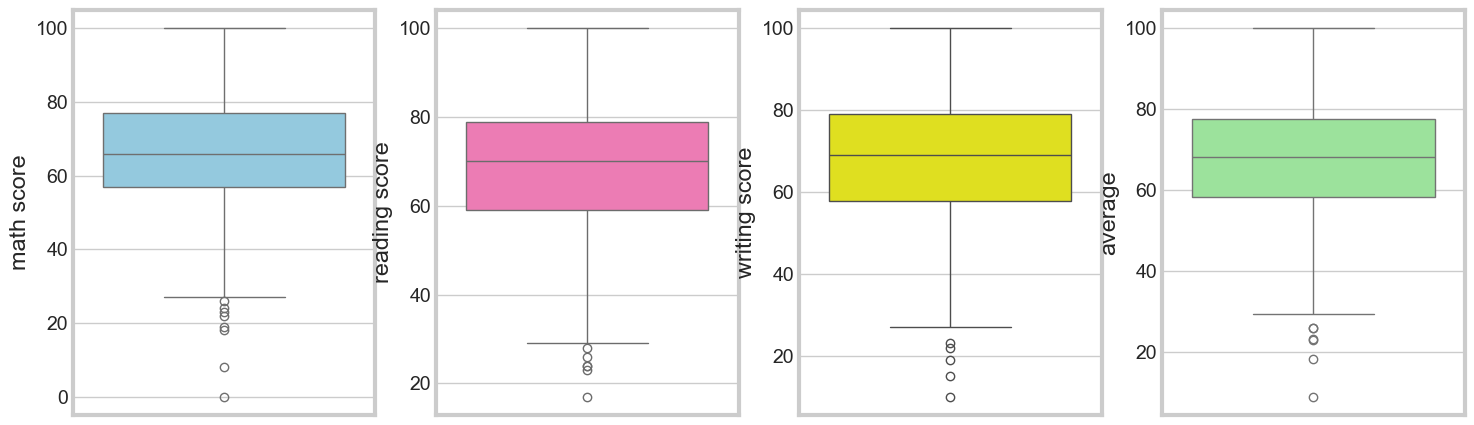

In [158]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['average'],color='lightgreen')
plt.show()

### **MUTIVARIATE ANALYSIS USING PAIRPLOT**

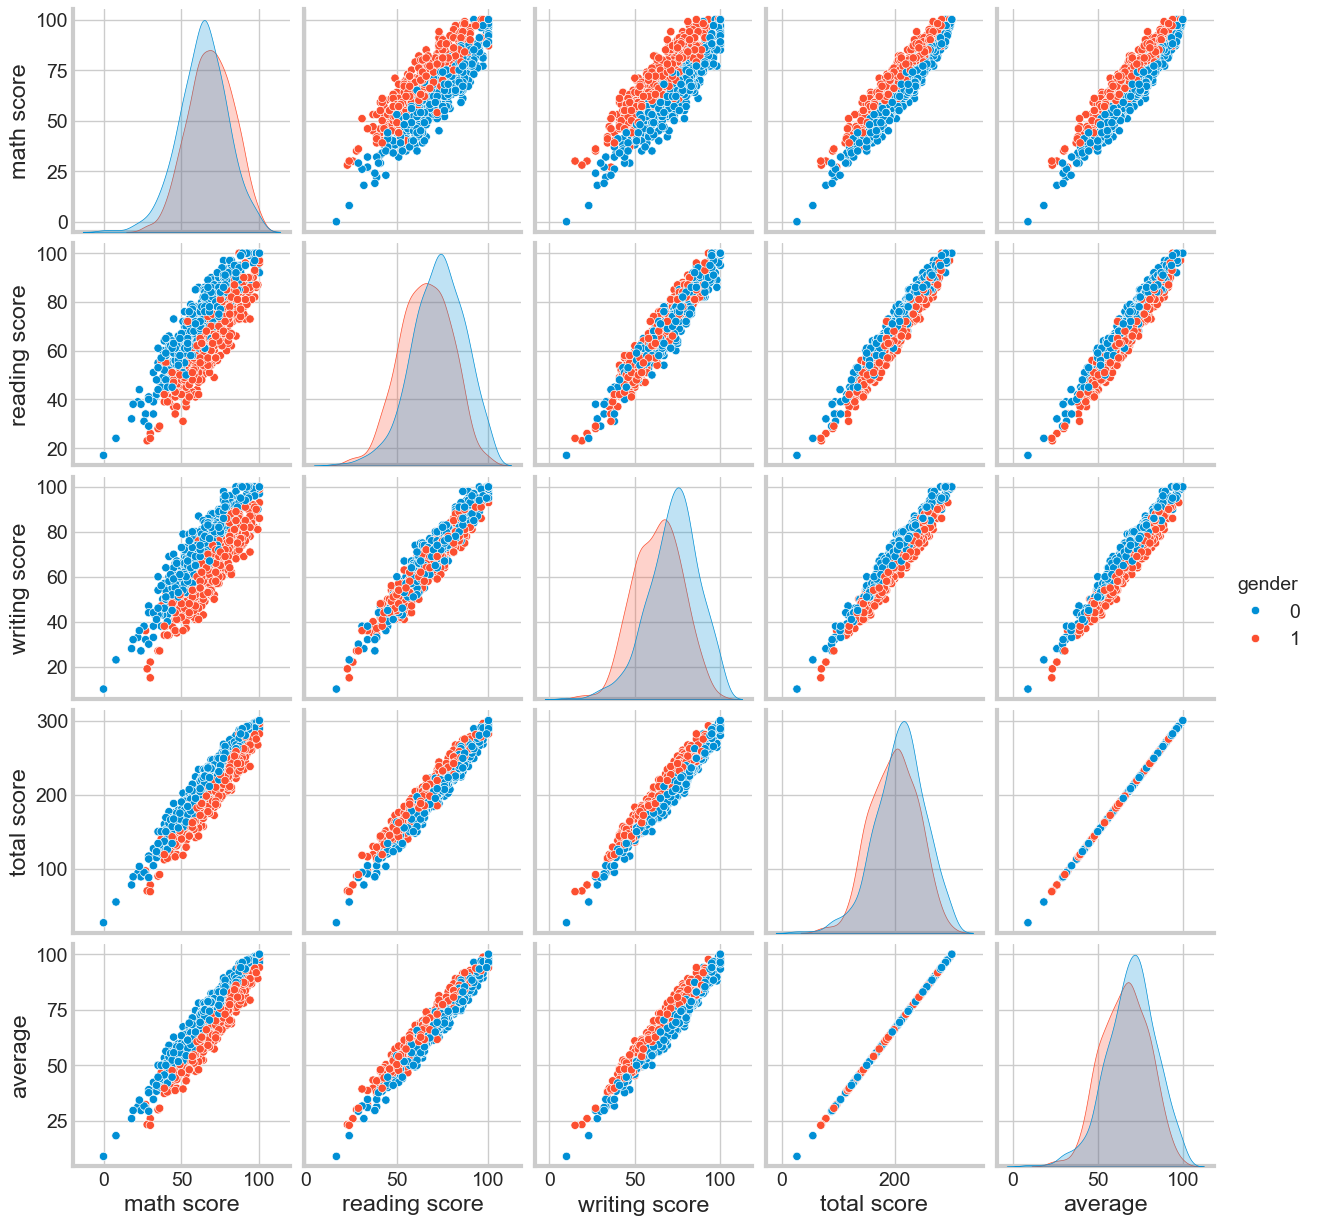

In [159]:
sns.pairplot(data,hue = 'gender')
plt.show()

In [160]:
# Save Engineered Data
data.to_csv('student_Data_Ready_for_feature_engineering_data.csv', index=False)

#### **Insights**
- From the above plot it is clear that all the scores increase linearly with each other.

### **5. Conclusions**

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

------
-----